In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [2]:
#Import CSV file
data = pd.read_csv("employee.csv")
data.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
data.shape

(374, 13)

In [4]:
data.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [5]:
data.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [7]:
 data = data.drop(["Person ID","Occupation","Physical Activity Level","Blood Pressure","Heart Rate"], axis=1)

In [8]:
data.columns

Index(['Gender', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Stress Level',
       'BMI Category', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

In [9]:
#preprocess encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

cols = ["Gender","BMI Category","Sleep Disorder"]

for col in cols:
    data[col] = le.fit_transform(data[col])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(le_name_mapping)
#     print(le.classes_)


data.head(10)

{'Female': 0, 'Male': 1}
{'Normal': 0, 'Normal Weight': 1, 'Obese': 2, 'Overweight': 3}
{'Insomnia': 0, 'None': 1, 'Sleep Apnea': 2}


,Gender,Age,Sleep Duration,Quality of Sleep,Stress Level,BMI Category,Daily Steps,Sleep Disorder
0,1,27,6.1,6,6,3,4200,1
1,1,28,6.2,6,8,0,10000,1
2,1,28,6.2,6,8,0,10000,1
3,1,28,5.9,4,8,2,3000,2
4,1,28,5.9,4,8,2,3000,2
5,1,28,5.9,4,8,2,3000,0
6,1,29,6.3,6,7,2,3500,0
7,1,29,7.8,7,6,0,8000,1
8,1,29,7.8,7,6,0,8000,1
9,1,29,7.8,7,6,0,8000,1


In [10]:
y = data["Stress Level"]
x = data.drop("Stress Level",axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
# Initialize the Support Vector Classifier
clf = SVC(random_state=42)

# Train the classifier on the training data
clf.fit(x_train, y_train)

SVC(random_state=42)

In [12]:
# Predict on the test data
y_pred = clf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.41333333333333333


In [13]:
input_data = [1,27,6.5,6,0,4200,1]
input_data = [input_data]
predicted_stress_level = clf.predict(input_data)

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [14]:
print("Predicted stress level:", predicted_stress_level[0])

Predicted stress level: 3


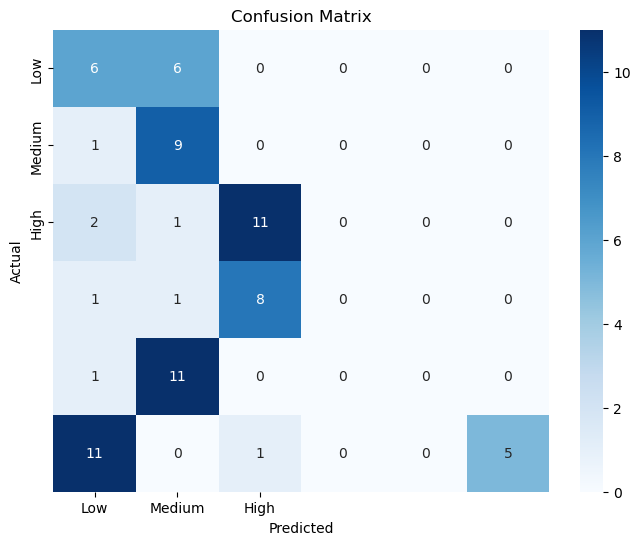

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

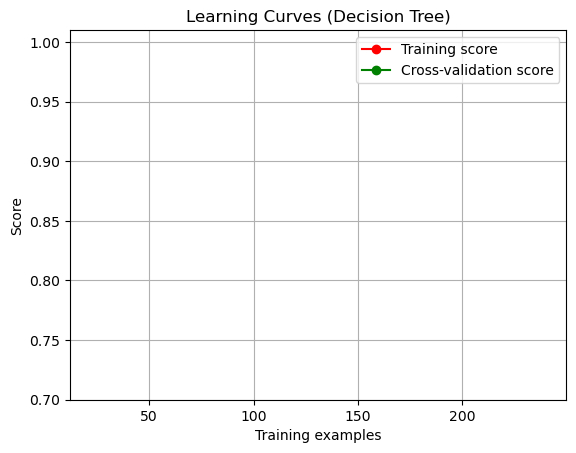

In [17]:
from sklearn.model_selection import learning_curve
import numpy as np

# Define a function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve
title = "Learning Curves (Decision Tree)"
plot_learning_curve(clf, title, x_train, y_train, ylim=(0.7, 1.01), cv=5, n_jobs=-1)

plt.show()